In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve
import warnings
warnings.simplefilter("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv('BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df.shape

(10127, 23)

In [7]:
df.drop(labels=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1, inplace=True)


In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Tratamento das variáveis categóricas

In [11]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [12]:
df['Attrition_Flag']= df['Attrition_Flag'].astype('category')

In [13]:
df['Attrition_Flag']= df["Attrition_Flag"].replace({"Existing Customer": 0, "Attrited Customer": 1})

In [14]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [15]:
df = pd.get_dummies(df, columns=['Education_Level'])


In [16]:
df = pd.get_dummies(df, columns=['Marital_Status'])


In [17]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,0,45,M,3,$60K - $80K,Blue,39,5,1,...,0,0,1,0,0,0,0,1,0,0
1,818770008,0,49,F,5,Less than $40K,Blue,44,6,1,...,0,1,0,0,0,0,0,0,1,0
2,713982108,0,51,M,3,$80K - $120K,Blue,36,4,1,...,0,1,0,0,0,0,0,1,0,0
3,769911858,0,40,F,4,Less than $40K,Blue,34,3,4,...,0,0,1,0,0,0,0,0,0,1
4,709106358,0,40,M,3,$60K - $80K,Blue,21,5,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,$40K - $60K,Blue,40,3,2,...,0,1,0,0,0,0,0,0,1,0
10123,710638233,1,41,M,2,$40K - $60K,Blue,25,4,2,...,0,0,0,0,0,1,1,0,0,0
10124,716506083,1,44,F,1,Less than $40K,Blue,36,5,3,...,0,0,1,0,0,0,0,1,0,0
10125,717406983,1,30,M,2,$40K - $60K,Blue,36,4,3,...,0,1,0,0,0,0,0,0,0,1


In [18]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [19]:
df['Income_Category_']=df["Income_Category"].replace({"Unknown":0,
                                                      "Less than $40K":1,
                                                      "$40K - $60K":2,
                                                      "$60K - $80K":3,
                                                      "$80K - $120K":4,
                                                      "$120K +":5})

In [20]:
df['Income_Category_']= df[['Income_Category_']].apply(pd.to_numeric) 


In [21]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [22]:
df['Card_Category_']=df["Card_Category"].replace({"Blue":1,"Silver":2,"Gold":3,"Platinum":4})

In [23]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [24]:
df["Gender_male"]=df["Gender"].replace({"F": 0, "M": 1})

<h4>Selecionando colunas<h4> 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Attrition_Flag                 10127 non-null  int64  
 2   Customer_Age                   10127 non-null  int64  
 3   Gender                         10127 non-null  object 
 4   Dependent_count                10127 non-null  int64  
 5   Income_Category                10127 non-null  object 
 6   Card_Category                  10127 non-null  object 
 7   Months_on_book                 10127 non-null  int64  
 8   Total_Relationship_Count       10127 non-null  int64  
 9   Months_Inactive_12_mon         10127 non-null  int64  
 10  Contacts_Count_12_mon          10127 non-null  int64  
 11  Credit_Limit                   10127 non-null  float64
 12  Total_Revolving_Bal            10127 non-null 

In [26]:
churn = df.copy()

In [27]:
churn.drop(axis=1,columns=['CLIENTNUM','Gender','Income_Category','Card_Category'], inplace=True)

In [28]:
churn.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_,Card_Category_,Gender_male
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,0,1,0,0,3,1,1
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,0,1,0,1,1,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,4,1,1
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,0,1,1,1,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,1,0,0,1,0,0,3,1,1


<h4>Regressão Logística<h4>

In [29]:
churn.corr()['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag                   1.000000
Contacts_Count_12_mon            0.204491
Months_Inactive_12_mon           0.152449
Education_Level_Doctorate        0.029386
Marital_Status_Single            0.019037
Dependent_count                  0.018991
Customer_Age                     0.018203
Months_on_book                   0.013687
Education_Level_Post-Graduate    0.011127
Education_Level_Unknown          0.009005
Marital_Status_Unknown           0.008904
Card_Category_                   0.002354
Marital_Status_Divorced          0.000850
Avg_Open_To_Buy                 -0.000285
Education_Level_Uneducated      -0.001444
Education_Level_College         -0.007840
Education_Level_Graduate        -0.009046
Education_Level_High School     -0.011730
Income_Category_                -0.013577
Marital_Status_Married          -0.023735
Credit_Limit                    -0.023873
Gender_male                     -0.037272
Total_Amt_Chng_Q4_Q1            -0.131063
Total_Relationship_Count        -0

In [30]:
churn.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_', 'Card_Category_',
       'Gender_male'],
      dtype='object')

In [31]:
y=churn['Attrition_Flag']
X=churn.drop(columns=['Attrition_Flag'])

In [32]:
X

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_,Card_Category_,Gender_male
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,0,0,1,0,0,3,1,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,0,1,0,1,1,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,0,1,0,0,4,1,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,0,0,1,1,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,1,0,0,1,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,0,0,0,0,1,0,2,1,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0,0,1,1,0,0,0,2,1,1
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,0,0,0,1,0,0,1,1,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,0,0,0,0,0,1,2,1,1


<h4>Separação entre treino e teste<h4> 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

<h4> Normalização <h4>

In [35]:
from sklearn.preprocessing import StandardScaler


In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

<h4> Modelo de regressão logística <h4>

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
model.score(X_train, y_train)

0.906385780118499

<h4> Métricas do Modelo <h4>

In [39]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

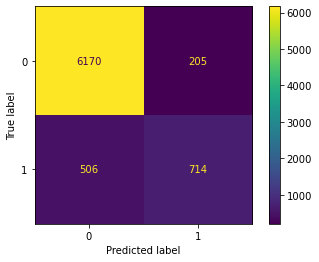

In [40]:
plot_confusion_matrix(model, X_train, y_train, values_format='.0f')

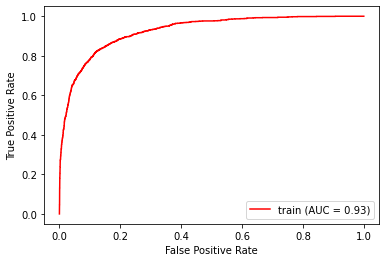

In [41]:
fig, ax = plt.subplots()

plot_roc_curve(model, X_train, y_train, color='red', ax= ax, name='train')

In [42]:
precision_score(y_train,model.predict(X_train))

0.7769314472252449

In [43]:
recall_score(y_train,model.predict(X_train))

0.5852459016393443

A métrica de Score do modelo é satisfatória, mas ao custo de um recall score muito baixo.

<h4> Métricas do modelo aplicada ao teste <h4>

In [44]:
X_test = scaler.transform(X_test)

In [45]:
model.score(X_test, y_test)

0.9040284360189573

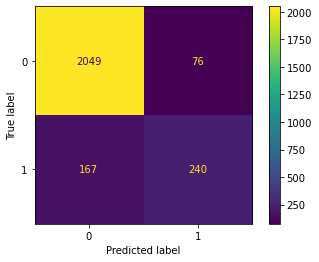

In [46]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

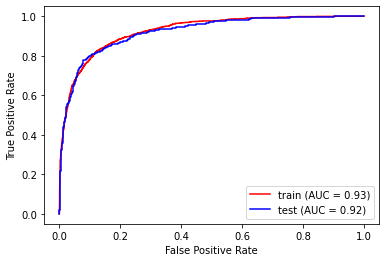

In [47]:
fig, ax = plt.subplots()

plot_roc_curve(model, X_train, y_train, color='red', ax= ax, name='train')
plot_roc_curve(model, X_test, y_test, color='blue', ax= ax, name='test')

In [48]:
precision_score(y_test,model.predict(X_test))

0.759493670886076

In [49]:
recall_score(y_test,model.predict(X_test))

0.5896805896805897

Assim como nos dados de treino, a métrica de Score do modelo é satisfatória, mas ao custo de um recall score muito baixo. O problema deste recall score baixo é que o modelo está com muitos falsos negativo. Para um problema em que se quer detectar quais os clientes tem tendência a deixar o cartão, isso é uma questão muito importante, já que o modelo está deixando passar vários clientes que estão deixando o cartão.

<h3> EDA <h3>

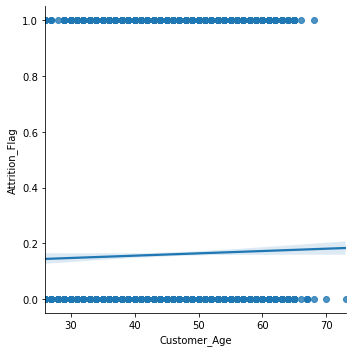

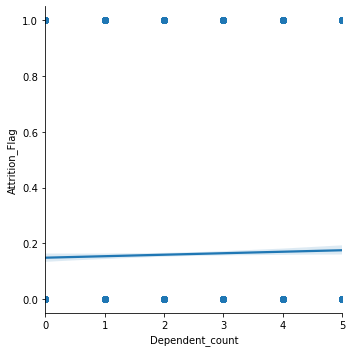

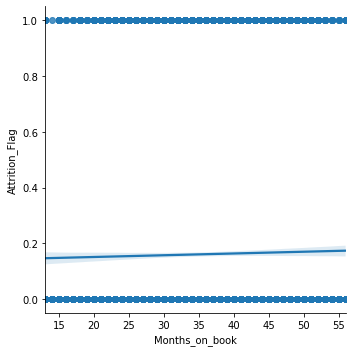

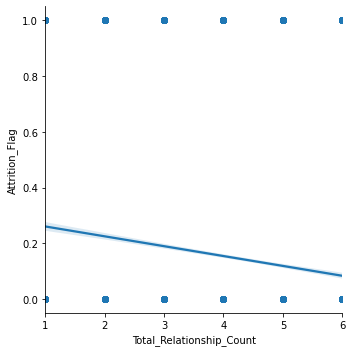

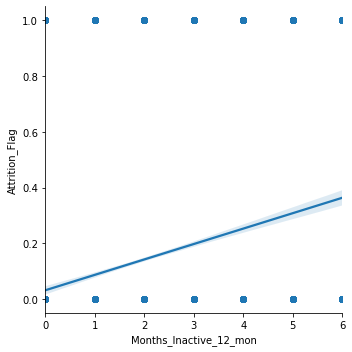

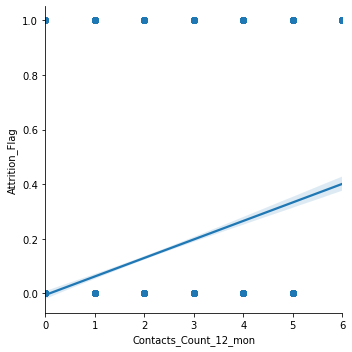

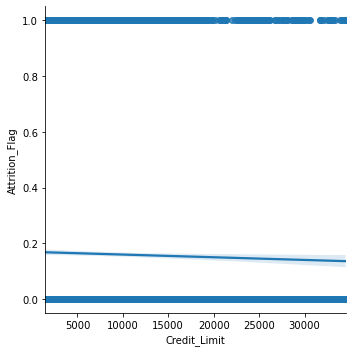

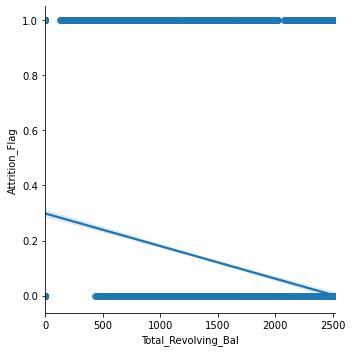

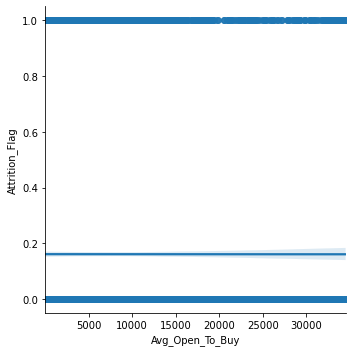

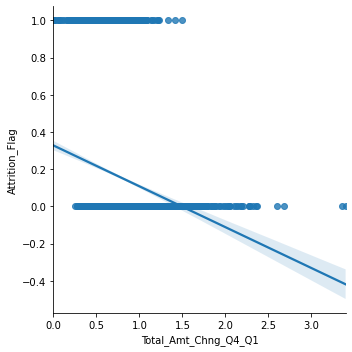

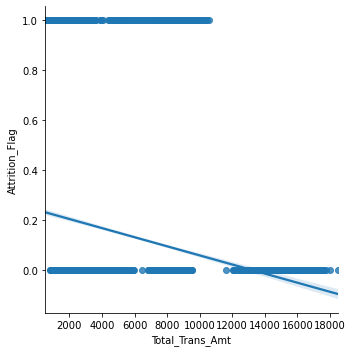

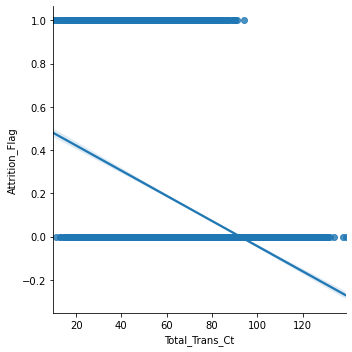

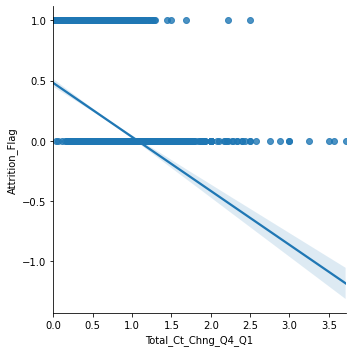

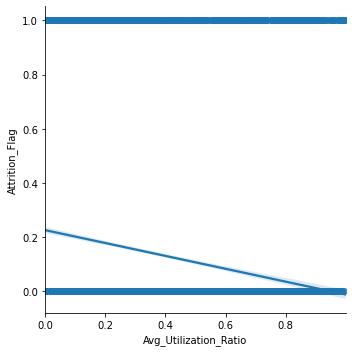

In [50]:
x_vars=['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
y_vars='Attrition_Flag'
for i in x_vars:
    sns.lmplot(x=i, y=y_vars, data=churn)
    plt.show()

In [51]:
churn.groupby(by='Attrition_Flag').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_,Card_Category_,Gender_male
Attrition_Flag,,,,,,,,,,,,,,,,,,,,,
0,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,...,0.049882,0.147059,0.148588,0.073765,0.468000,0.385294,0.072941,2.094471,1.083294,0.479059
1,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,...,0.056546,0.145667,0.157345,0.074370,0.435771,0.410572,0.079287,2.039951,1.085433,0.428396


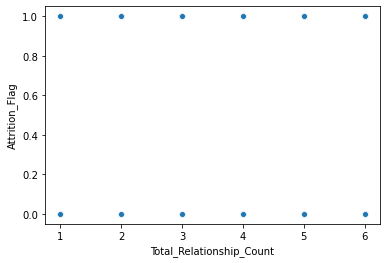

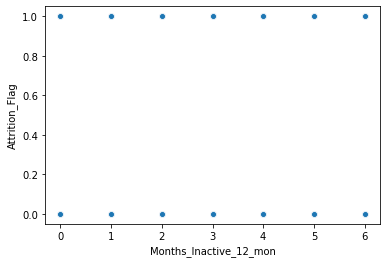

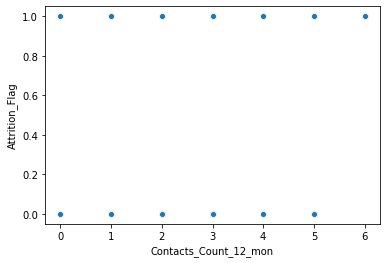

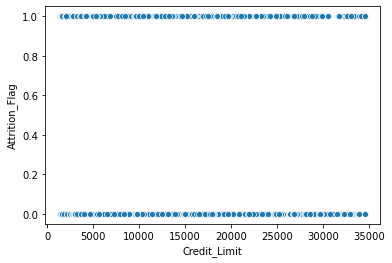

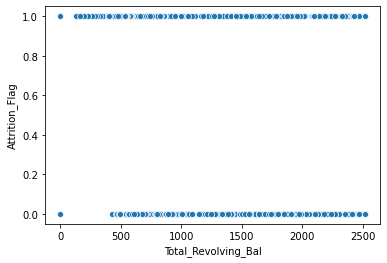

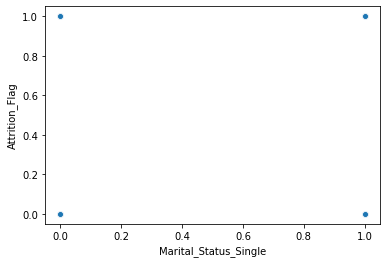

In [52]:
x_vars=['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Marital_Status_Single']
y_vars='Attrition_Flag'
for i in x_vars:
    sns.scatterplot(x=i, y=y_vars, data=churn)
    plt.show()

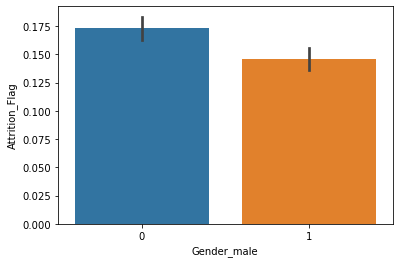

In [81]:
sns.barplot(x="Gender_male",y="Attrition_Flag",data=churn)

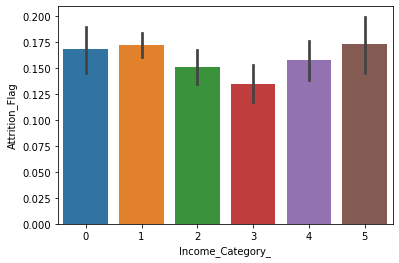

In [82]:
sns.barplot(x="Income_Category_",y="Attrition_Flag",data=churn)

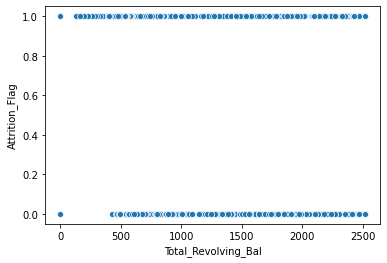

In [83]:
sns.scatterplot(x="Total_Revolving_Bal", y="Attrition_Flag", data=churn)

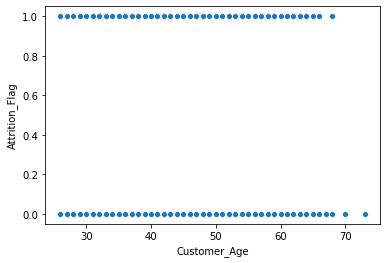

In [84]:
sns.scatterplot(x='Customer_Age', y="Attrition_Flag", data=churn)

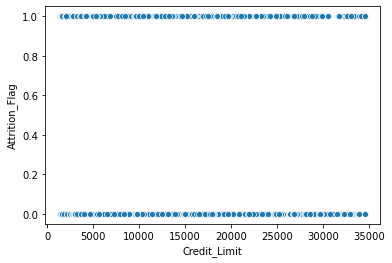

In [85]:
sns.scatterplot(x="Credit_Limit", y="Attrition_Flag",data=churn)

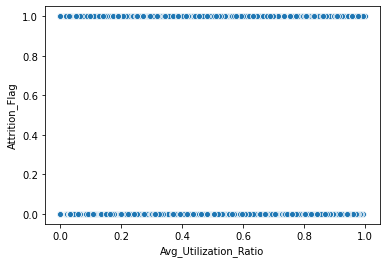

In [92]:
sns.scatterplot(x='Avg_Utilization_Ratio', y="Attrition_Flag", data=churn)

<h3> Análise da Regressão <h3>

In [53]:
churn['Attrition_Flag'][churn['Total_Revolving_Bal']<400].sum()

964

In [54]:
churn['Attrition_Flag'][churn['Total_Revolving_Bal']<400]

2        0
4        0
12       0
21       1
24       0
        ..
10109    0
10112    1
10114    0
10124    1
10125    1
Name: Attrition_Flag, Length: 2541, dtype: int64

In [55]:
churn['Attrition_Flag'][churn['Total_Revolving_Bal']<500].sum()

998

In [56]:
churn['Attrition_Flag'][churn['Total_Revolving_Bal']<500]

2        0
4        0
12       0
21       1
24       0
        ..
10109    0
10112    1
10114    0
10124    1
10125    1
Name: Attrition_Flag, Length: 2595, dtype: int64

In [57]:
churn['Attrition_Flag'].sum()

1627

In [58]:
churn[(churn['Total_Revolving_Bal']<50) & (churn['Total_Revolving_Bal']>0)]

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_,Card_Category_,Gender_male


In [59]:
churn['Attrition_Flag'][(churn['Total_Revolving_Bal']==0)].sum()# & (churn['Total_Revolving_Bal']>0)]

893

In [60]:
model.coef_

array([[-0.03633884,  0.19433587, -0.00935599, -0.70567342,  0.4980468 ,
         0.56311858, -0.08476241, -0.7805242 , -0.01495001, -0.05809624,
         1.5533721 , -2.69745645, -0.71132688, -0.01060674,  0.01725308,
         0.06488086, -0.04352343, -0.02818938, -0.00325785,  0.02227942,
         0.01577142,  0.01466885, -0.18116666,  0.14458603,  0.06058973,
         0.23555582,  0.15295187, -0.52269554]])

In [61]:
coef_by_columns=pd.Series(dict(zip(churn.columns,model.coef_[0])))

In [62]:
coef_by_columns.sort_values()

Total_Trans_Amt                 -2.697456
Credit_Limit                    -0.780524
Total_Trans_Ct                  -0.711327
Months_on_book                  -0.705673
Card_Category_                  -0.522696
Marital_Status_Divorced         -0.181167
Contacts_Count_12_mon           -0.084762
Avg_Open_To_Buy                 -0.058096
Education_Level_Doctorate       -0.043523
Attrition_Flag                  -0.036339
Education_Level_Graduate        -0.028189
Total_Revolving_Bal             -0.014950
Total_Ct_Chng_Q4_Q1             -0.010607
Dependent_count                 -0.009356
Education_Level_High School     -0.003258
Education_Level_Unknown          0.014669
Education_Level_Uneducated       0.015771
Avg_Utilization_Ratio            0.017253
Education_Level_Post-Graduate    0.022279
Marital_Status_Single            0.060590
Education_Level_College          0.064881
Marital_Status_Married           0.144586
Income_Category_                 0.152952
Customer_Age                     0

<h4> Clusterização <h4>

<h5> PCA <h5>

In [63]:
from sklearn.decomposition import PCA


In [64]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [65]:
pca

PCA(n_components=2)

In [66]:
pca.components_

array([[-1.90793498e-02,  6.28057809e-02, -1.39219035e-02,
        -8.34142851e-02, -1.94427433e-02,  9.22025426e-03,
         4.92572310e-01, -6.97927573e-02,  4.99057766e-01,
        -2.85113012e-03,  1.67034829e-01,  1.07764656e-01,
        -1.22856486e-02, -3.40767447e-01,  1.44573657e-03,
        -1.55315940e-03, -6.73388877e-03, -1.94516035e-03,
         2.15402765e-02,  2.69697548e-03, -5.44286514e-03,
         1.02580387e-02, -6.81586671e-02,  4.83847188e-02,
         2.92371964e-02,  3.56354776e-01,  2.87263171e-01,
         3.43094716e-01],
       [-2.25751371e-01,  5.90560242e-02, -2.17123533e-01,
        -2.65331381e-01, -6.46000525e-02, -1.59083144e-01,
        -4.47452915e-02,  1.02506091e-01, -5.39408870e-02,
         6.52086547e-02,  5.15317190e-01,  5.43360319e-01,
         1.30220480e-01,  1.15564478e-01, -7.11368734e-03,
        -2.86807276e-02, -3.49303967e-04, -1.22570381e-02,
         1.21843128e-02,  1.56205197e-02,  1.36155367e-02,
         3.34199007e-02, -2.33

In [67]:
pca.components_[0]

array([-0.01907935,  0.06280578, -0.0139219 , -0.08341429, -0.01944274,
        0.00922025,  0.49257231, -0.06979276,  0.49905777, -0.00285113,
        0.16703483,  0.10776466, -0.01228565, -0.34076745,  0.00144574,
       -0.00155316, -0.00673389, -0.00194516,  0.02154028,  0.00269698,
       -0.00544287,  0.01025804, -0.06815867,  0.04838472,  0.0292372 ,
        0.35635478,  0.28726317,  0.34309472])

In [68]:
pca.transform(X_train)

array([[-0.41437471, -2.76925655],
       [ 2.13234507,  4.29631459],
       [ 3.78249556,  0.10113642],
       ...,
       [ 2.16350475,  1.83960583],
       [-2.51339781, -0.43761006],
       [-0.08897892,  0.15954886]])

In [69]:
pc1 = pca.transform(X_train)[:,0]
pc2 = pca.transform(X_train)[:,1]

Text(0, 0.5, 'PC2')

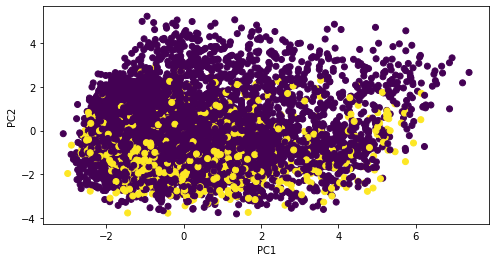

In [70]:
plt.figure(figsize=(8,4))
plt.scatter(pc1, pc2, c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

A redução de dimensionalidade não trouxe nenhuma solução aparente

<h2> LGBM <h2>

In [71]:
from lightgbm import LGBMClassifier

In [72]:
lgbm = LGBMClassifier(max_depth=3, n_estimators=60, colsample_bytree=.7, n_jobs=-1)

In [73]:
lgbm.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=3, n_estimators=60)

In [74]:
y_pred=lgbm.predict(X_train)

In [87]:
lgbm.score(X_train,y_train)

0.9690585911784069

In [88]:
precision_score(y_train,model.predict(X_train))

0.7769314472252449

In [89]:
recall_score(y_train,model.predict(X_train))

0.5852459016393443

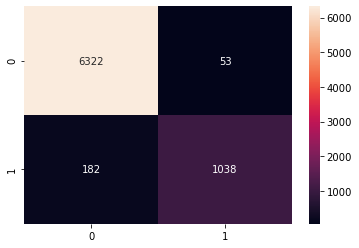

In [77]:
#plot_confusion_matrix(lgbm, X_train, y_train, values_format='.0f')
sns.heatmap(confusion_matrix(y_train,lgbm.predict(X_train)),annot=True,fmt="d");

In [76]:
lgbm.score(X_test,y_test)

0.9589257503949447

In [90]:
precision_score(y_test,model.predict(X_test))

0.759493670886076

In [91]:
recall_score(y_test,model.predict(X_test))

0.5896805896805897

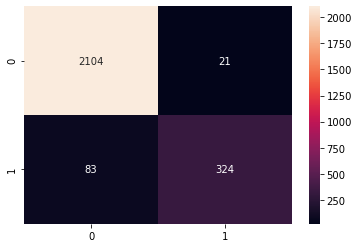

In [78]:
#plot_confusion_matrix(lgbm, X_test, y_test, values_format='.0f')
sns.heatmap(confusion_matrix(y_test,lgbm.predict(X_test)),annot=True,fmt="d");

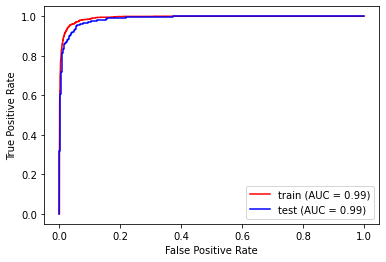

In [79]:
fig, ax = plt.subplots()

plot_roc_curve(lgbm, X_train, y_train, color='red', ax= ax, name='train')
plot_roc_curve(lgbm, X_test, y_test, color='blue', ax= ax, name='test')